In [2]:
#Example 11
import pandas

#I am creating a dictionary here titled inputdata
inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pandas.read_csv('example8results.csv', header=[0], index_col=0).to_dict()

#We can use type to check the data type of a variable
#print(type(inputdata))

#I am using the column headers from the csv file to find the data I am interested to analyze

# I created a new dictionary here for the description column in my csv file
lyricsdictionary = inputdata.get('Lyrics')
#print(type(descriptiondictionary))

# I am converting the dictionary to a list so I can analyze the data
lyricslist =  list(lyricsdictionary.values())
#print(lyricslist)


from profanity_check import predict, predict_prob

#0 means there is no offensive language. 1 is the opposite
profanity_prediction_list = predict(lyricslist)
print(profanity_prediction_list)

profanity_probability_list= predict_prob(lyricslist)
print(profanity_probability_list)

file = pandas.read_csv('example8results.csv')
file['Profanity Prediction Score'] = profanity_prediction_list
file['Profanity Prediction Probability'] = profanity_probability_list

#Index is false because example 1.csv file already has an index column
file.to_csv('example11results.csv', index=False)

print("done")


[0 0 0 0]
[0.11558874 0.14246548 0.02107162 0.10927799]
done


In [3]:
#Example 12
import re
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

def read_data(file):
    data = []
    with open(file, 'r')as f:
        for line in f:
            line = line.strip()
            label = ' '.join(line[1:line.find("]")].strip().split())
            text = line[line.find("]")+1:].strip()
            data.append([label, text])
    return data
#This text file is an input to build an emotion detection classifier.
file = 'text.txt'
data = read_data(file)
print("Number of instances: {}".format(len(data)))

def ngram(token, n):
    output = []
    for i in range(n-1, len(token)):
        ngram = ' '.join(token[i-n+1:i+1])
        output.append(ngram)
    return output

def create_feature(text, nrange=(1, 1)):
    text_features = []
    text = text.lower()
    text_alphanum = re.sub('[^a-z0-9#]', ' ', text)
    for n in range(nrange[0], nrange[1]+1):
        text_features += ngram(text_alphanum.split(), n)
    text_punc = re.sub('[a-z0-9]', ' ', text)
    text_features += ngram(text_punc.split(), 1)
    return Counter(text_features)


def convert_label(item, name):
    items = list(map(float, item.split()))
    label = ""
    for idx in range(len(items)):
        if items[idx] == 1:
            label += name[idx] + " "

    return label.strip()


emotions = ["joy", 'fear', "anger", "sadness", "disgust", "shame", "guilt"]

X_all = []
y_all = []
for label, text in data:
    y_all.append(convert_label(label, emotions))
    X_all.append(create_feature(text, nrange=(1, 4)))

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.2, random_state = 123)

def train_test(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, clf.predict(X_train))
    test_acc = accuracy_score(y_test, clf.predict(X_test))
    return train_acc, test_acc

from sklearn.feature_extraction import DictVectorizer
vectorizer = DictVectorizer(sparse = True)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

svc = SVC()
lsvc = LinearSVC(random_state=123)
rforest = RandomForestClassifier(random_state=123)
dtree = DecisionTreeClassifier()

#I am using only the random forest classifier from the tutorial
clifs = [rforest]

# train and test them
print("| {:25} | {} | {} |".format("Classifier", "Training Accuracy", "Test Accuracy"))
print("| {} | {} | {} |".format("-"*25, "-"*17, "-"*13))
for clf in clifs:
    clf_name = clf.__class__.__name__
    train_acc, test_acc = train_test(clf, X_train, X_test, y_train, y_test)
    print("| {:25} | {:17.7f} | {:13.7f} |".format(clf_name, train_acc, test_acc))

emoji_dict = {"joy":"joy", "fear":"fear", "anger":"anger", "sadness":"sadness", "disgust":"disgust", "shame":"shame", "guilt":"quilt"}

import pandas
#Let's use our lyrics data to classify songs with respect to the emotions above

inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pandas.read_csv('example11results.csv', header=[0], index_col=0).to_dict()

#We can use type to check the data type of a variable
#print(type(inputdata))

#I am using the column headers from the csv file to find the data I am interested to analyze

# I created a new dictionary here for the description column in my csv file
lyricsdictionary = inputdata.get('Lyrics')
#print(type(descriptiondictionary))

# I am converting the dictionary to a list so I can analyze the data
lyricslist =  list(lyricsdictionary.values())
#print(lyricslist)
emotionresults_list=[]
for text in lyricslist :
    features = create_feature(text, nrange=(1, 4))
    features = vectorizer.transform(features)
    prediction = clf.predict(features)[0]
    print("Emotion:", emoji_dict[prediction])
    emotionresults_list.append(emoji_dict[prediction])

file = pandas.read_csv('example11results.csv')
file['Emotion'] = emotionresults_list

file.to_csv('example12results.csv', index=False)
print("done")


Number of instances: 7480
| Classifier                | Training Accuracy | Test Accuracy |
| ------------------------- | ----------------- | ------------- |
| RandomForestClassifier    |         0.9988302 |     0.5541444 |
Emotion: fear
Emotion: anger
Emotion: anger
Emotion: fear
done


In [4]:
#Example 13
import pandas
import re

#I am creating a dictionary here titled inputdata
inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pandas.read_csv('example8results.csv', header=[0], index_col=0).to_dict()

#We can use type to check the data type of a variable
#print(type(inputdata))

#I am using the column headers from the csv file to find the data I am interested to analyze

# I created a new dictionary here for the description column in my csv file
lyricsdictionary = inputdata.get('Lyrics')
#print(type(descriptiondictionary))

# I am converting the dictionary to a list so I can analyze the data
lyricslist =  list(lyricsdictionary.values())

lyrics_string= str(lyricslist)
#I am cleaning the lyrics text
cleaned_text = lyrics_string.replace("\\n","")
cleaned_text = lyrics_string.replace("<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});","")
cleaned_text = lyrics_string.replace("\\s","")
cleaned_text = lyrics_string.replace('\\',"")

#Open explicit words file
explicitwords_file = open("explicitwords.txt", "r")

explicitwords_data_string = explicitwords_file.read()

pattern = r'[0-9]'

explicitwords_data_string = re.sub(pattern, '', explicitwords_data_string)

explicitwords_list= explicitwords_data_string.split()
output={"ExplicitWords":[]}
songs_explicit_words_list=[]
for explicitword in explicitwords_list:
    counter=0
    if len(explicitword)>2:
        if (explicitword not in ['dream','play','make','hit','wild','off','men','her','your','and','love','huge','tea','one','two','are','baby','straight','gone', 'baby' 'men','brown','white','eat','black','girl','hot','jack','come','jacket']):
         if explicitword in cleaned_text:
            #print(explicitword)
            songs_explicit_words_list.append(explicitword)

output = {"ExplicitWord":[],"Frequency":[]}
counterdictionary={}
for explicitword in songs_explicit_words_list:
    output["ExplicitWord"].append(explicitword)
    counterdictionary[explicitword] = songs_explicit_words_list.count(explicitword)
    output['Frequency'].append(counterdictionary[explicitword])

# Remove duplicate values in dictionary
# Using setdefault() method

results = pandas.DataFrame(output)
results= results.drop_duplicates(keep='first')
#print(results)

#Explicit Words in Rihanna's Scraped Songs
results.to_csv('example13results.csv', index=True, index_label="Index")
print("done")


done


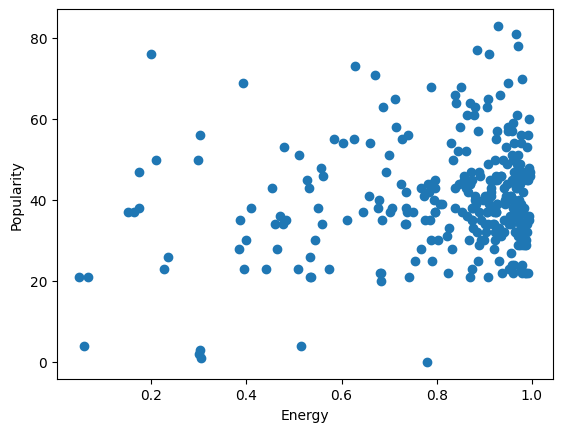

In [5]:
#Example 14
import pandas

#I am creating a dictionary here titled inputdata
inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pandas.read_csv('example4results.csv', header=[0], index_col=0).to_dict()

#We can use type to check the data type of a variable
#print(type(inputdata))

#I am using the column headers from the csv file to find the data I am interested to analyze

# I created a new dictionary here for the energy column in my csv file
energydictionary = inputdata.get('energy')

# I am converting the dictionary to a list so I can analyze the data
energylist =  list(energydictionary.values())

popularitydictionary = inputdata.get('popularity')

popularitylist =  list(popularitydictionary.values())

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.scatter(energylist,popularitylist)
plt.xlabel("Energy")
plt.ylabel("Popularity")
plt.show()

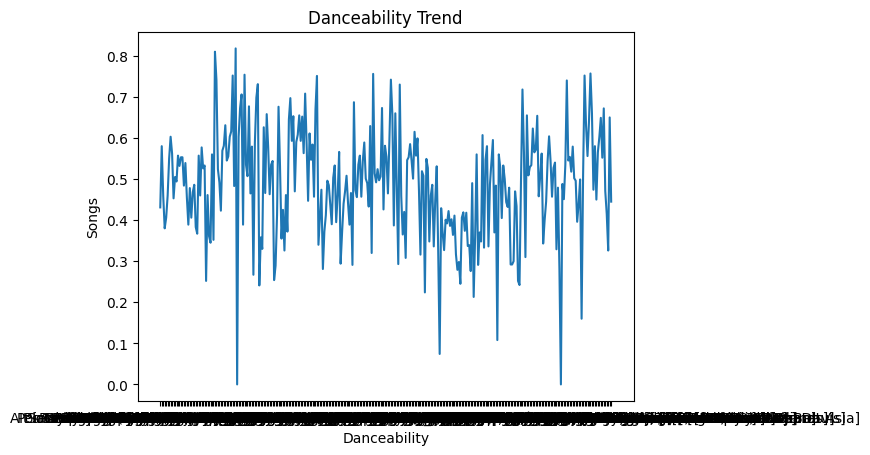

In [6]:
#Example 15
import pandas

#I am creating a dictionary here titled inputdata
inputdata={}
#I am assigning the content of the csv file to my dictionary
#header is my row in the csv file that is why header is 0 below
inputdata = pandas.read_csv('example4results.csv', header=[0], index_col=0).to_dict()

#We can use type to check the data type of a variable
#print(type(inputdata))

#I am using the column headers from the csv file to find the data I am interested to analyze

# I created a new dictionary here for the description column in my csv file
songdictionary = inputdata.get('name')

# I am converting the dictionary to a list so I can analyze the data
songlist =  list(songdictionary.values())

danceabilitydictionary = inputdata.get('danceability')

danceabilitylist =  list(danceabilitydictionary.values())

import matplotlib.pyplot as plt

x_axis = songlist
y_axis = danceabilitylist

plt.plot(x_axis, y_axis)
plt.title('Danceability Trend')
plt.xlabel('Danceability')
plt.ylabel('Songs')
plt.show()